In [ ]:
import keras
keras.__version__

'2.12.0'

In [ ]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
#2차원 28x28형태의 이미지가 60000만개 있는 형태여서 3차원
print(train_images.ndim)

3


In [ ]:
test_images.shape

(10000, 28, 28)

2


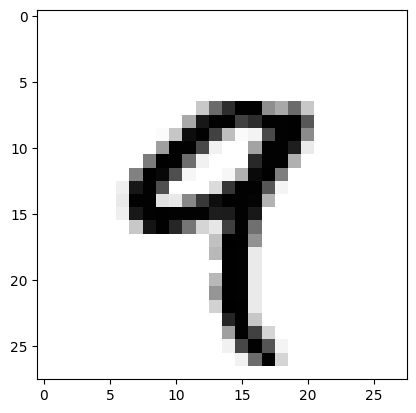

In [ ]:
#데이터의 확인
import matplotlib.pyplot as plt

digit = train_images[4]
#그림자체는 2차원 데이터(흑백이기 때문)
print(digit.ndim)

plt.imshow(digit, cmap = plt.cm.binary)
#plt.cm.binary는 흑백 이미지를 위한 색상 맵 중 하나

In [ ]:
from keras import models
from keras import layers

#순차적으로 layer를 쌓아나가겠다
network = models.Sequential()

#첫번째 layer에서 28*28을 해주어야하지만 512로 줄여서 적용
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [ ]:
#데이터를 준비하는 과정

#데이터셋이 3차원으로 되어있는데 이것을 2차원으로 줄인다.
train_images = train_images.reshape((60000, 28*28))
#28*28개의 픽셀데이터로 이루어져있는데 0~255사이의 값인 픽셀데이터를 255로 나누어주어서
#0과1 사이의 데이터값으로 만들어줘야 인공지능신경망에서 학습하기가 용이하다.
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [ ]:
from tensorflow.keras.utils import to_categorical
#테스트 데이터의 레이블을 One-Hot-Encoding으로 바꿔주는 것은 인공신경망 학습에서 일반적인 전처리 작업

#0부터 9까지의 레블값을 이진 벡터로 표현해주는 함수 예를들어 5는 [0,0,0,0,1,0,0,0,0] 이런식으로 표현해준다.
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# 신경망의 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 16ms/step - loss: 0.2649 - accuracy: 0.9233
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1060 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0702 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0502 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0379 - accuracy: 0.9889


In [ ]:
#신경망학습 테스트

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc:', test_acc)
print('test loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0611 - accuracy: 0.9804
test acc: 0.980400025844574
test loss: 0.06112901121377945


In [ ]:
#인터넷 영화 리뷰 데이터 평가

from keras.datasets import imdb
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

#리뷰에 사용된 빈도수가 높은 단어 10000개를 가져온 것
#그리고 각 단어를 정수데이터로 변환해서 저장


17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(25000,)

In [ ]:
#라벨데이터는 긍정은 1 부정은 0으로 라벨링 된 데이터셋
train_labels[0:5]

array([1, 0, 0, 1, 0])

In [ ]:
max([max(sequence) for sequence in train_data])
#train데이터를 sequence에 담고 sequence중 빈도수가 제일 큰 순서대로 할당
#제일 바깥 max()는 할당 받은 인덱스 값중 제일 큰 값

9999

In [ ]:
#데이터를 준비

import numpy as np

#배열의 길이를 sequences로 받고 열(데이터의 features)를 디폴트 값으로 10000으로 지정
def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  #모두 0으로 채운 2차원 배열 --> 행은 train_data의 단어들이 매칭된 정수값길이 만큼, dimension은 10000

  print(result.shape)

  for i, sequence in enumerate(sequences):
  #enumerate는 데이터를 인덱스값과 데이터값을 나누어서 열거형으로 정리해주는 함수

    result[i, sequence] = 1
    #만개의 단어 데이터가 있으므로 dimension을 10000으로 지정하여 해당 단어가 있으면 1로 바꾸어준다.
  return result

#이 모든 과정을 하는 이유는 인공신경망은 이진 행렬 형태로 데이터를 넣는게 좋기 때문

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [ ]:
x_train[0]
#신경망 데이터를 할 때에는 데이터를 float형태로 해야한다.
#numpy의 기본값은 float

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
#라벨 데이터도 실수형으로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train[0]

1.0

In [ ]:
#신경망 제막
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#feature의 개수가 10000개이다. None부분은 동적으로 채운다는 의미 
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#데이터를 나누어서 평가하는데에 쓸 수 있기 때문에 한번 더 나누어주어 데이터 처리를 하였다.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 65ms/step - loss: 0.0199 - accuracy: 0.9977 - val_loss: 0.5458 - val_accuracy: 0.8649
Epoch 2/4
30/30 [==============================] - 2s 64ms/step - loss: 0.0181 - accuracy: 0.9982 - val_loss: 0.5599 - val_accuracy: 0.8676
Epoch 3/4
30/30 [==============================] - 1s 49ms/step - loss: 0.0153 - accuracy: 0.9981 - val_loss: 0.5826 - val_accuracy: 0.8686
Epoch 4/4
30/30 [==============================] - 1s 35ms/step - loss: 0.0119 - accuracy: 0.9992 - val_loss: 0.6649 - val_accuracy: 0.8651


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

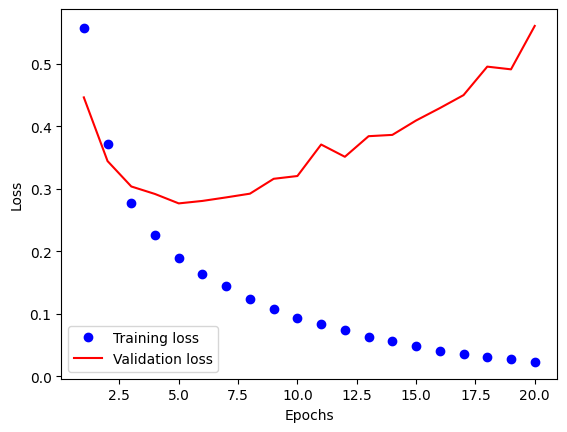

In [ ]:
import matplotlib.pyplot as plt

#y축에 넣을 데이터
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

#x축에 넣을 데이터
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

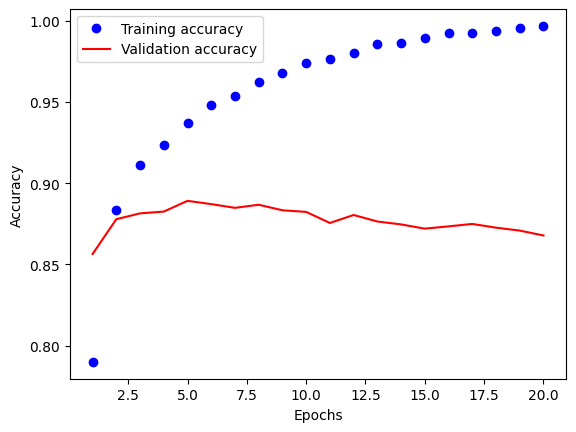

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
model.predict(x_test)
#각 배열의 값이 0.5보다 크면 긍정 작으면 부정

782/782 [==============================] - 3s 3ms/step


array([[0.02283158],
       [1.        ],
       [0.977317  ],
       ...,
       [0.00621835],
       [0.04309968],
       [0.9935737 ]], dtype=float32)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss={0}, accuracy={1}'.format(test_loss, test_acc))

782/782 [==============================] - 3s 3ms/step - loss: 0.7025 - accuracy: 0.8548
loss=0.7025251388549805, accuracy=0.8547999858856201
